## Collect all results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


import warnings
warnings.simplefilter("ignore")

In [2]:
list_dataset = [
    "Amazon-lb",
    "Lastfm",
    "QK-video",
    "ML-10M"    
]

model = "NCL"
# model = "NCL_combmnz"

total_k = 5
window = 5


results = {}
for dataset in list_dataset:
    results[dataset] = {}
    for k in range(0,total_k,1):
        start = k
        stop = k+window

        results[dataset][f"{start+1}-{stop}"] = pd.read_pickle(f"sliding/result_{dataset}_{model}_at{total_k}_{start}-{stop}.pickle")

In [3]:
def flatten_dict(nested_dict):
    res = OrderedDict()
    if isinstance(nested_dict, dict):
        for k in nested_dict:
            if k in ["best_valid_score", "valid_score_bigger", "best_valid_result"]:
                continue
            flattened_dict = flatten_dict(nested_dict[k])
            for key, val in flattened_dict.items():
                key = list(key)
                key.insert(-1, k)
                res[tuple(key)] = val
    else:
        res[()] = nested_dict
    return res

df = pd.DataFrame(pd.Series(flatten_dict(results)))
original_order = df.index.get_level_values(2).unique()

df = df.unstack(0)
df = df.droplevel(0, axis=1)
df = df.reindex(original_order, level=1)
df


1-5       2-6       3-7       4-8       5-9
Amazon-lb HR@5       0.027460  0.011442  0.009153  0.016018  0.013730
          MRR@5      0.021053  0.004844  0.003623  0.007857  0.007437
          P@5        0.005950  0.002746  0.002288  0.003661  0.002746
          MAP@5      0.007027  0.003810  0.002117  0.003997  0.003032
          R@5        0.010031  0.006522  0.004233  0.005732  0.004015
...                       ...       ...       ...       ...       ...
QK-video  IBO_our@5  0.023409  0.028286  0.029017  0.031456  0.031700
          IWO_our@5  0.976591  0.971714  0.970983  0.968544  0.968300
          IFD_div@5  0.015287  0.014220  0.014012  0.013329  0.013037
          IFD_mul@5  0.000012  0.000010  0.000009  0.000008  0.000008
          HD@5       0.507752  0.515495  0.520101  0.528548  0.535735

[108 rows x 5 columns]

In [4]:
from datetime import datetime

In [5]:
now = datetime.now()
time = str(now.strftime("%Y-%m-%d_%H%M%S"))

In [6]:
# df.to_csv(f"sliding/sliding_experiment_results_{time}.csv")

## Load results and filter

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sliding/sliding_experiment_results_2024-01-02_150047.csv", index_col=[0,1])

In [3]:
df

1-5       2-6       3-7       4-8       5-9
Amazon-lb HR@5       0.027460  0.011442  0.009153  0.016018  0.013730
          MRR@5      0.021053  0.004844  0.003623  0.007857  0.007437
          P@5        0.005950  0.002746  0.002288  0.003661  0.002746
          MAP@5      0.007027  0.003810  0.002117  0.003997  0.003032
          R@5        0.010031  0.006522  0.004233  0.005732  0.004015
...                       ...       ...       ...       ...       ...
QK-video  IBO_our@5  0.023409  0.028286  0.029017  0.031456  0.031700
          IWO_our@5  0.976591  0.971714  0.970983  0.968544  0.968300
          IFD_div@5  0.015287  0.014220  0.014012  0.013329  0.013037
          IFD_mul@5  0.000012  0.000010  0.000009  0.000008  0.000008
          HD@5       0.507752  0.515495  0.520101  0.528548  0.535735

[108 rows x 5 columns]

In [ ]:
df = df.loc[~df.index.get_level_values(1).str.contains("(Jain|QF|Ent|FSat|Gini|IBO|IWO)_ori")]

In [5]:
unique_measures = df.index.get_level_values(1).unique()

In [6]:
def clean(k):
    k = k.strip("@5")
    k = k.replace("_our","")
    k = k.replace("_ori","")
    k = k.replace("_true","")
    k = k.replace("_div","$_{\div}$")
    k = k.replace("_mul","$_{\\times}$")
    return k

In [7]:
dict_index_for_rename = dict((k, clean(k)) for k in unique_measures)

In [8]:
dict_index_for_rename

{'HR@5': 'HR',
 'MRR@5': 'MRR',
 'P@5': 'P',
 'MAP@5': 'MAP',
 'R@5': 'R',
 'NDCG@5': 'NDCG',
 'Jain_our@5': 'Jain',
 'QF_our@5': 'QF',
 'Ent_our@5': 'Ent',
 'Gini_our@5': 'Gini',
 'FSat_our@5': 'FSat',
 'IAA_true_ori@5': 'IAA',
 'MME_ori@5': 'MME',
 'II-F_ori@5': 'II-F',
 'AI-F_ori@5': 'AI-F',
 'IBO_our@5': 'IBO',
 'IWO_our@5': 'IWO',
 'IFD_div@5': 'IFD$_{\\div}$',
 'IFD_mul@5': 'IFD$_{\\times}$',
 'HD@5': 'HD'}

In [9]:
df = df.rename(index=dict_index_for_rename, level=1)

## Plot

### Group measures

In [10]:
measures = dict_index_for_rename.values()
measures

dict_values(['HR', 'MRR', 'P', 'MAP', 'R', 'NDCG', 'Jain', 'QF', 'Ent', 'Gini', 'FSat', 'IAA', 'MME', 'II-F', 'AI-F', 'IBO', 'IWO', 'IFD$_{\\div}$', 'IFD$_{\\times}$', 'HD'])

In [127]:
rel_measures = ['HR', 'MRR', 'P', 'MAP', 'R', 'NDCG']
fair_measures = ['Jain', 'Gini', 'QF', 'Ent', 'FSat']
joint_measures = [m for m in measures if m not in rel_measures and m not in fair_measures]
joint_measures

['IAA',
 'MME',
 'II-F',
 'AI-F',
 'IBO',
 'IWO',
 'IFD$_{\\div}$',
 'IFD$_{\\times}$',
 'HD']

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 400


def forward(x):
    return x**(1/10)

def inverse(x):
    return x**10 * np.sign(x)

In [129]:
list_dataset = df.index.get_level_values(0).unique()
list_dataset

Index(['Amazon-lb', 'Lastfm', 'ML-10M', 'QK-video'], dtype='object')

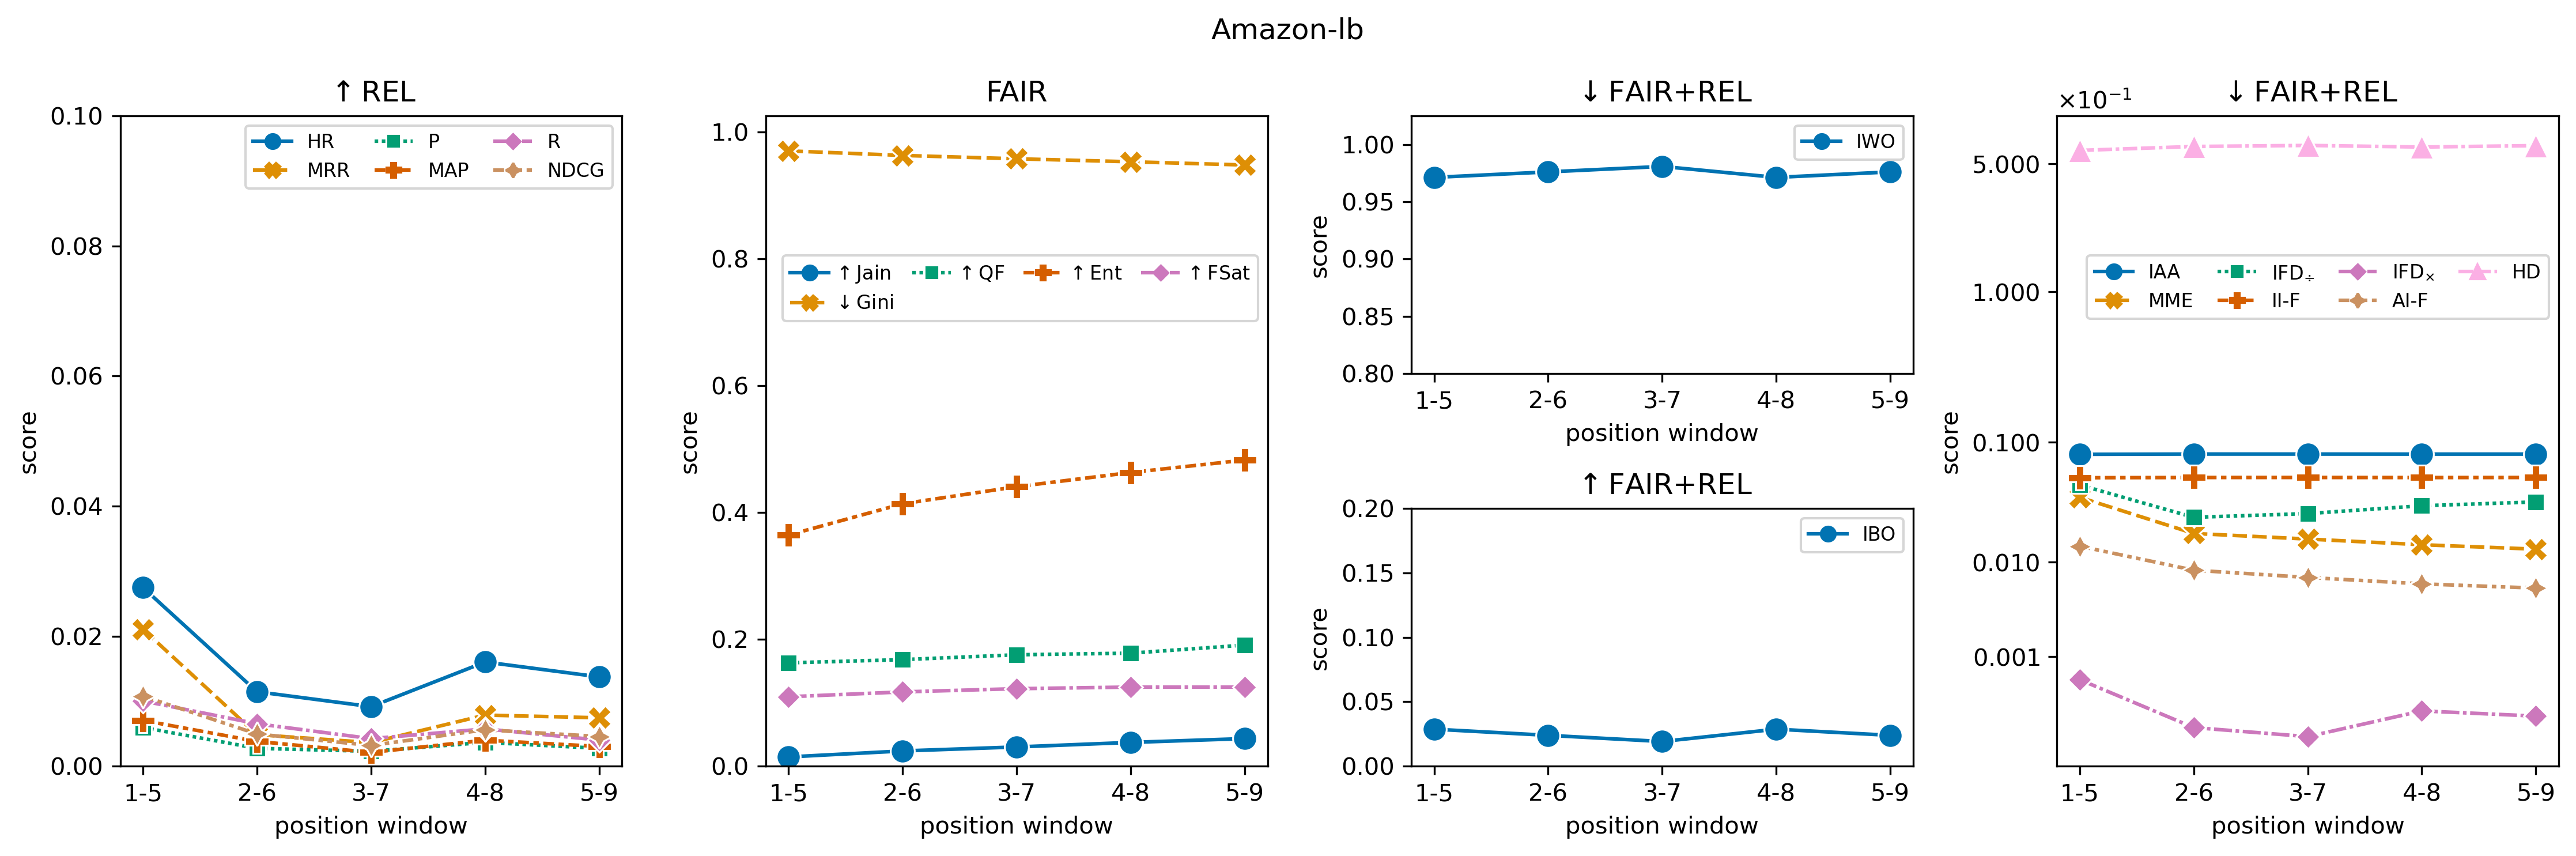

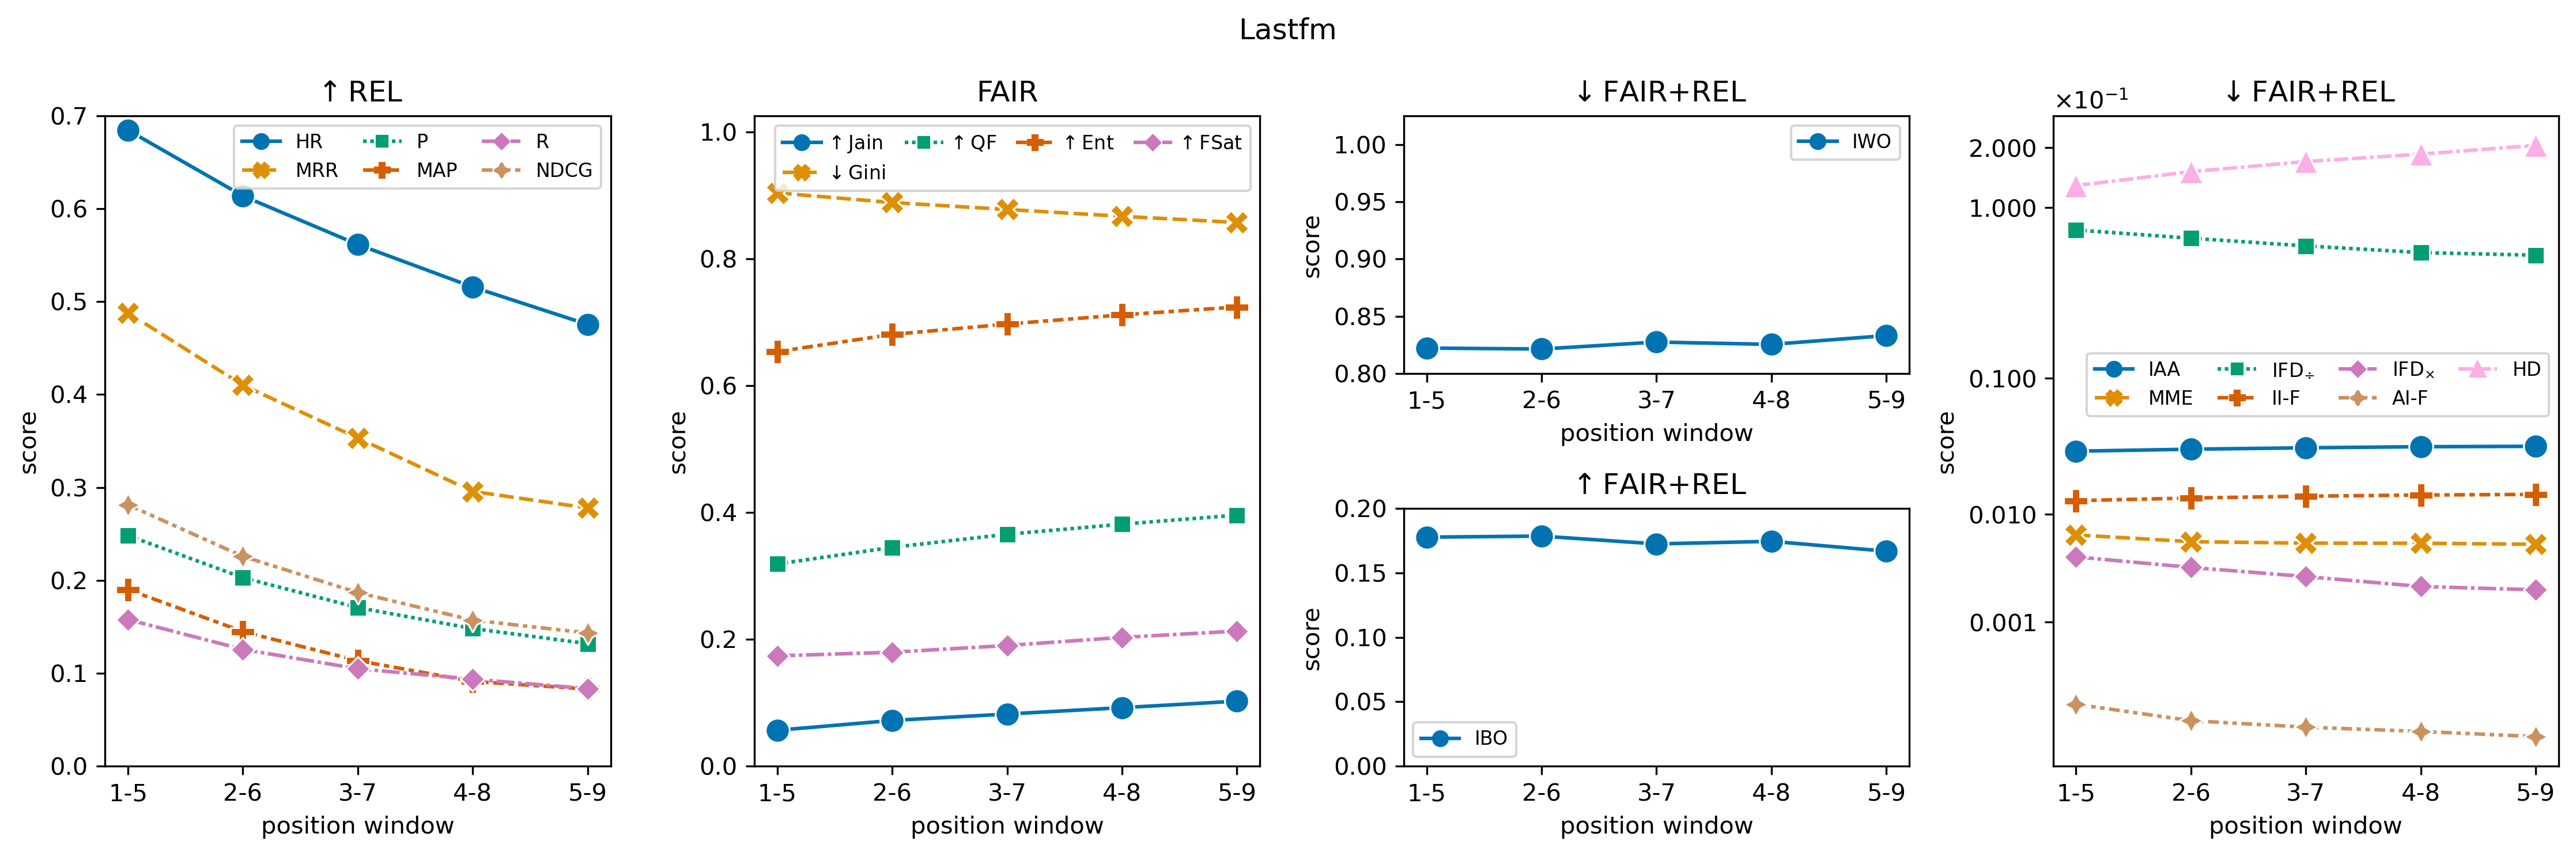

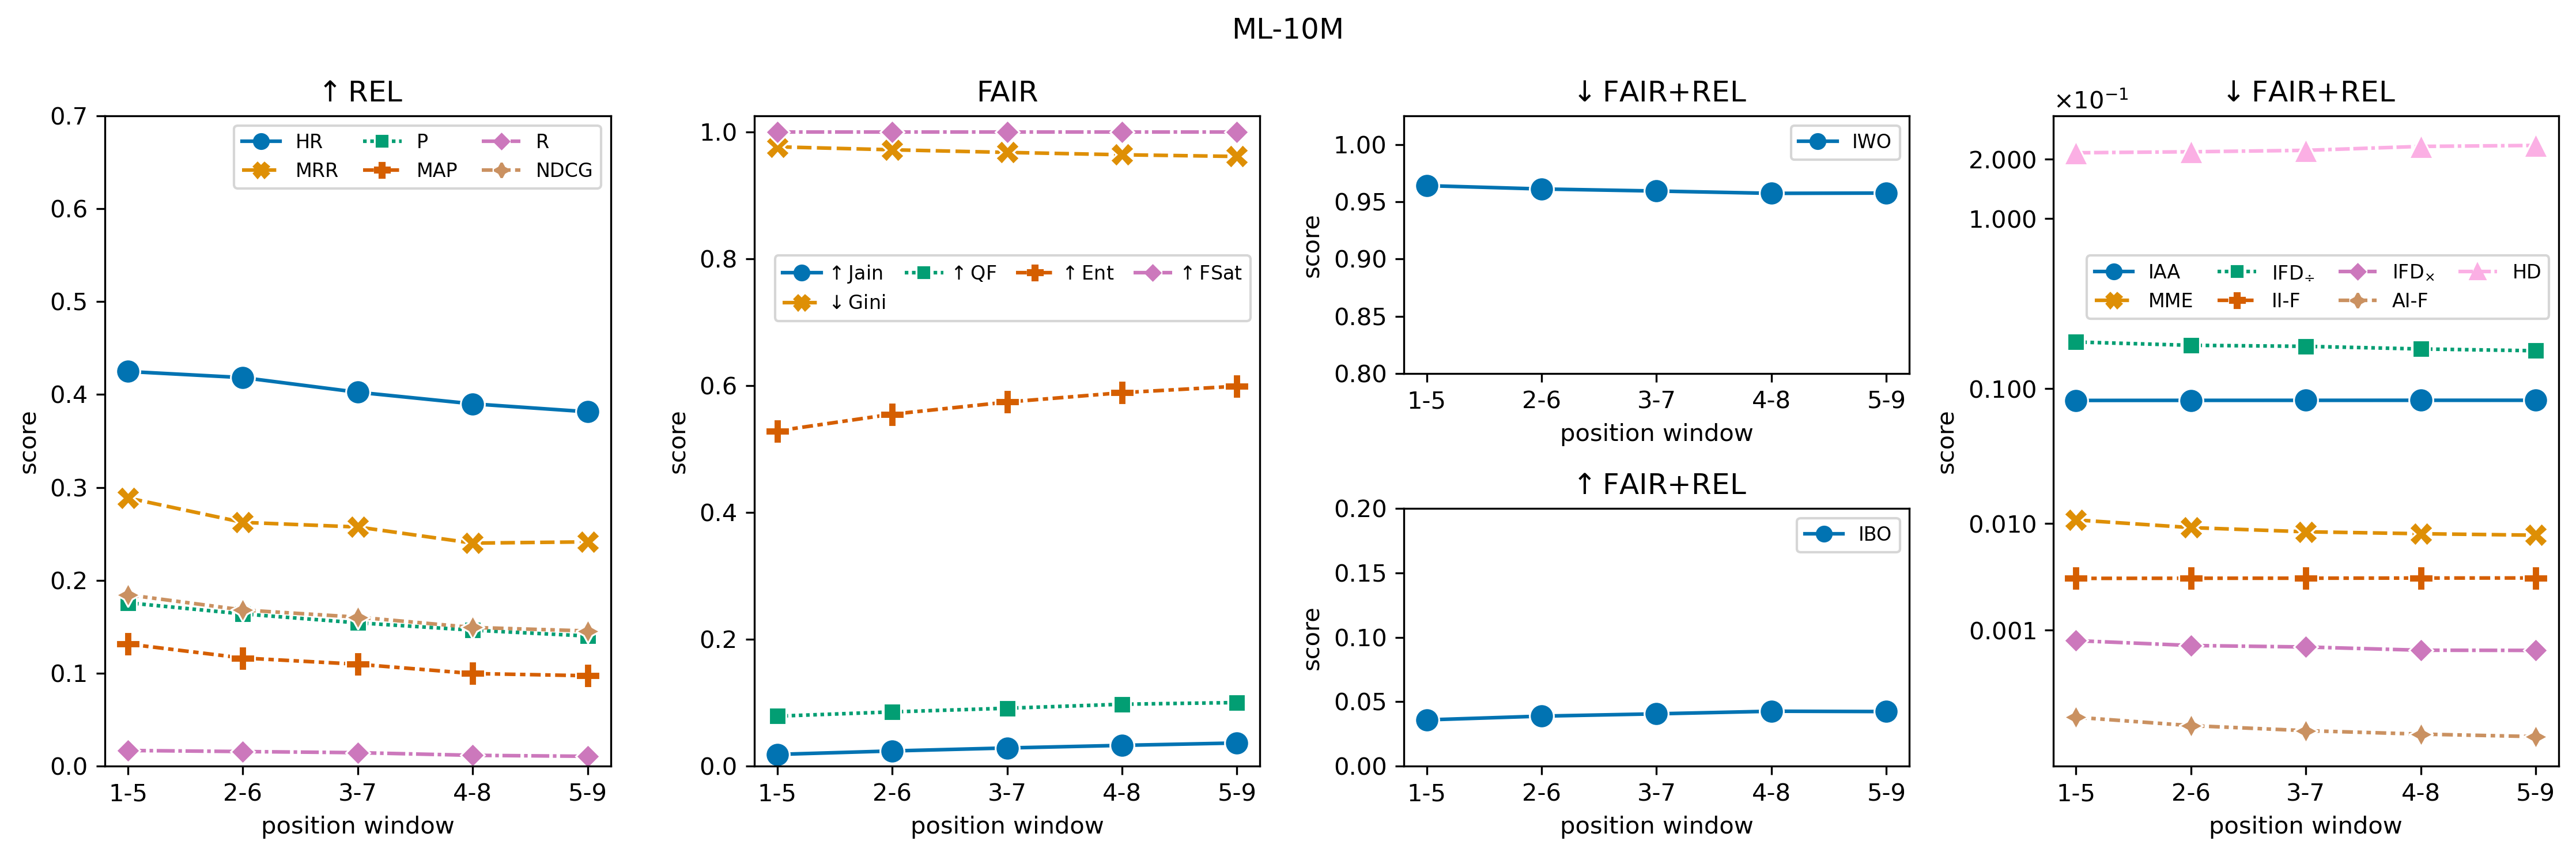

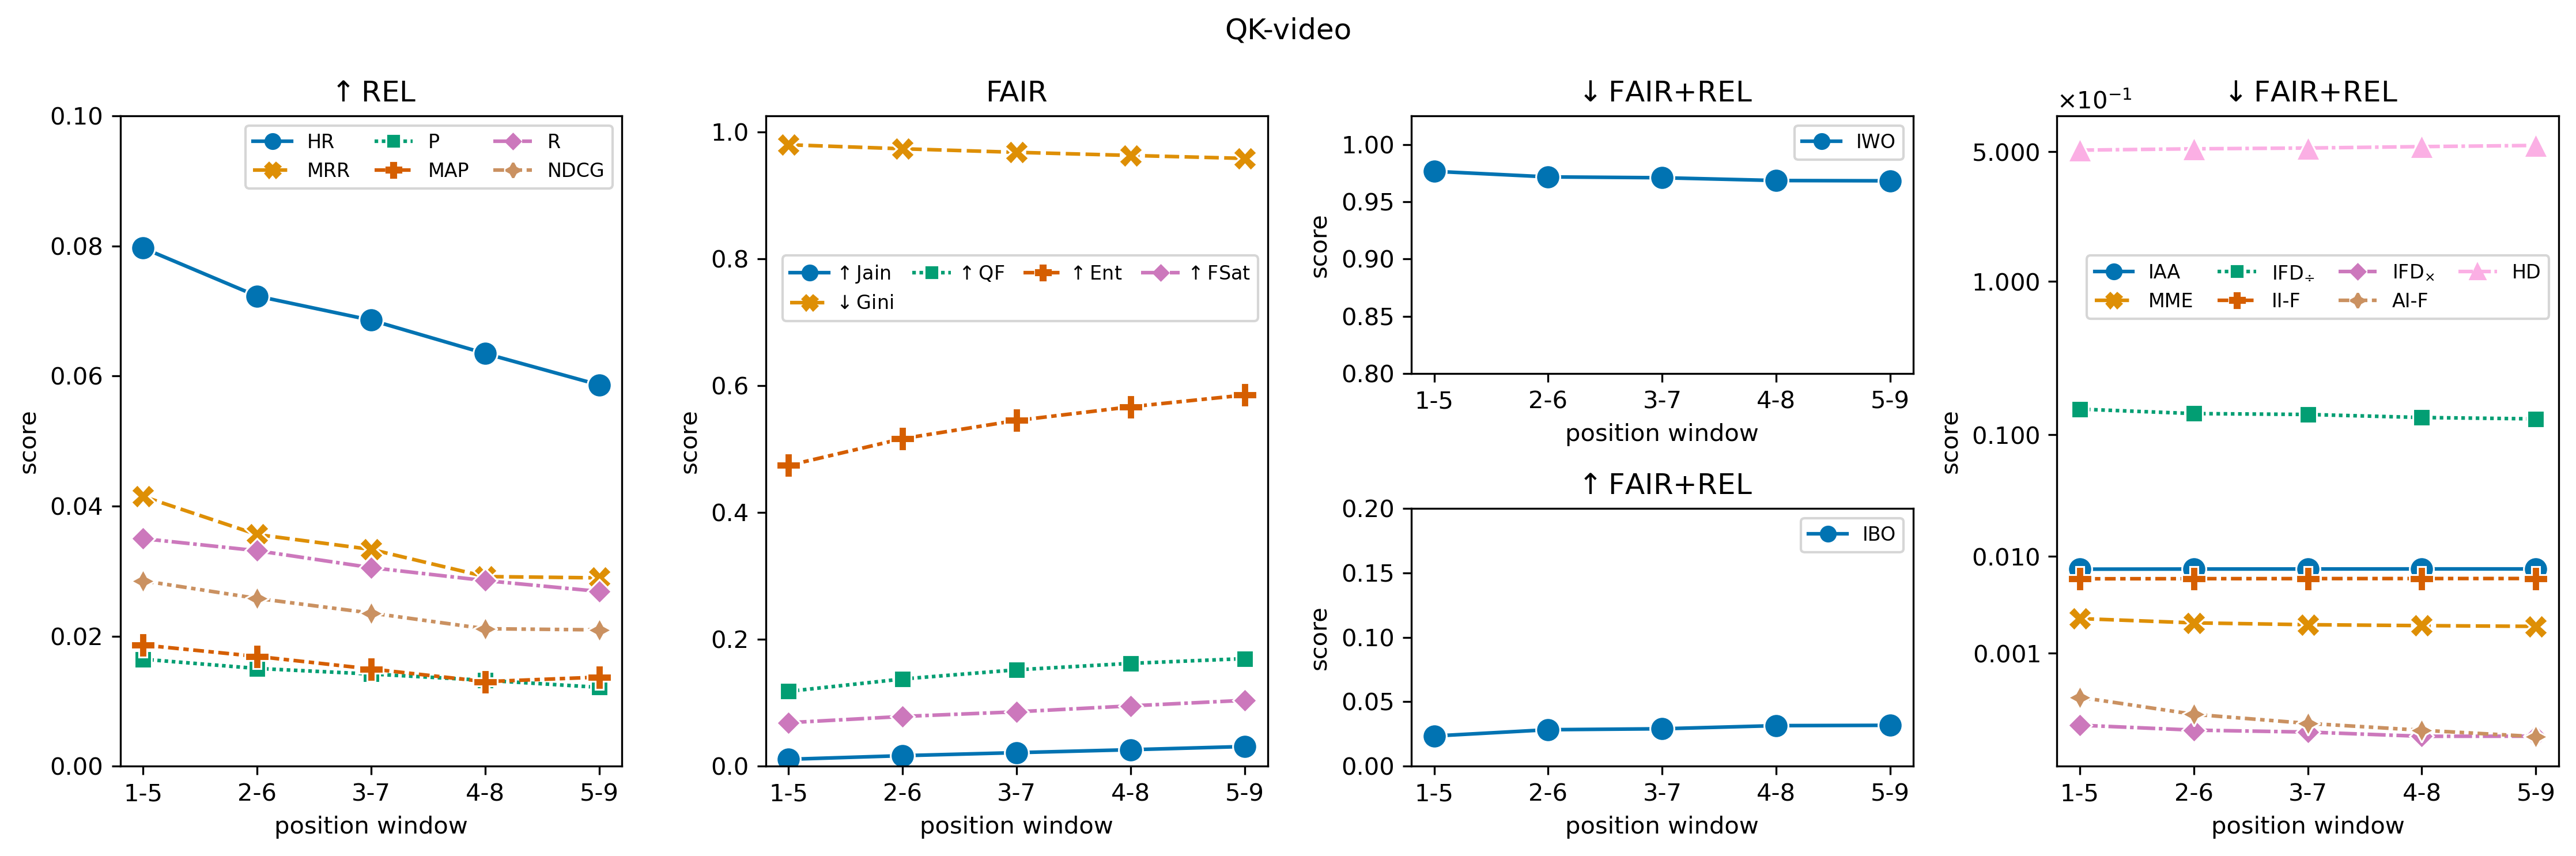

In [134]:
up = "$\\uparrow$"
down = "$\downarrow$"

plotting_dict = {"palette":"colorblind", "markers":True, "markersize":10}

joint_group1 = ["IBO"]
joint_group2 = ["IWO"]
joint_group3 = ['IAA', 'MME', 'IFD$_{\div}$', 'II-F', 'IFD$_{\\times}$','AI-F', "HD"]

dataset_small_rel = ["Amazon-lb", "QK-video"]
dataset_big_rel = ["ML-10M", "Lastfm"]

def add_arrow(list_measure:list):
    new_list = []
    for m in list_measure:
        if "Gini" in m:
            new_m = down + m
        elif m in ["Jain", "QF","Ent", "FSat"]:
            new_m = up + m 
        new_list.append(new_m)
    return new_list

for data in list_dataset:
    thisdata = df.loc[data]
    fig, axes = plt.subplot_mosaic("ABDF;ABEF", figsize=(15,5))
    fig.suptitle(f"{data}")
    sns.lineplot(thisdata.loc[thisdata.index.isin(rel_measures)].T,ax=axes["A"], **plotting_dict)
    sns.lineplot(thisdata.loc[thisdata.index.isin(fair_measures)].T[fair_measures],ax=axes["B"], **plotting_dict)
    sns.lineplot(thisdata.loc[thisdata.index.isin(joint_group2)].T,ax=axes["D"], **plotting_dict)
    sns.lineplot(thisdata.loc[thisdata.index.isin(joint_group1)].T,ax=axes["E"], **plotting_dict)
    sns.lineplot(thisdata.loc[thisdata.index.isin(joint_group3)].T[joint_group3],ax=axes["F"], **plotting_dict)

    axes["A"].set_title(f"{up}REL")
    axes["B"].set_title(f"FAIR")
    axes["D"].set_title(f"{down}FAIR+REL")
    axes["E"].set_title(f"{up}FAIR+REL")
    axes["F"].set_title(f"{down}FAIR+REL")

    axes["F"].set_yscale('function', functions=(forward,inverse))




    for ax in axes.values():
        ax.set_xlabel('position window')
        ax.set_ylabel('score')

    axes["A"].legend(ncols=3,columnspacing=1.25, fontsize=8)
    axes["D"].legend(ncols=3,columnspacing=1.25, fontsize=8)
    axes["E"].legend(ncols=3,columnspacing=1.25, fontsize=8)

    if data in dataset_small_rel:
        axes["A"].set_ylim([0, 0.1])
        axes["F"].set_yticks([10**-4, 10**-3, 10**-2, 0.1, 0.5])

    elif data in dataset_big_rel:
        axes["A"].set_ylim([0, 0.7])
        axes["F"].set_yticks([10**-4, 10**-3, 10**-2, 0.1, 0.2])
    
    handles, previous_labels =  axes["B"].get_legend_handles_labels()
    new_labels = add_arrow(previous_labels)
    if data in dataset_small_rel or data == "ML-10M":
        axes["F"].legend(ncols=4,columnspacing=1.25, fontsize=8,loc="upper right", bbox_to_anchor=(1, 0.8))
        axes["B"].legend(handles=handles, labels=new_labels, ncols=4,columnspacing=1, fontsize=8, handletextpad=0.2,loc="upper right", bbox_to_anchor=(1, 0.8))
    else:
        axes["F"].legend(ncols=4,columnspacing=1.25, fontsize=8,loc="upper right", bbox_to_anchor=(1, 0.65))
        axes["B"].legend(handles=handles, labels=new_labels, ncols=4,columnspacing=1, fontsize=8, handletextpad=0.2)

    axes["B"].set_ylim([0, 1.025])
    axes["D"].set_ylim([0.8, 1.025])
    axes["E"].set_ylim([0, 0.2])
    
    axes["F"].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)


    plt.tight_layout()
    now = datetime.now()
    time = str(now.strftime("%Y-%m-%d_%H%M%S"))
    plt.savefig(f'sliding/temp/temp_sliding_{time}_{data}.pdf', bbox_inches="tight")

    plt.show()
    # break
